In [15]:
import numpy as np

In [16]:
import pandas as pd

In [17]:
import matplotlib as mpl

In [18]:
%matplotlib inline


In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import tensorflow as tf
from tensorflow import keras
#MaxPool2D – Maximum pooling layer is used to reduce the size of images
#Dropout – Dropout is a regularization technique to reduce overfitting
#Flatten – to convert the parrel layers to squeeze the layers
#Dense –  for feed-forward neural network

In [26]:
imgs_path = "G:/speed_racing_datasets\Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


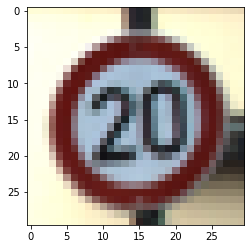

In [7]:
path = "G:/speed_racing_datasets/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [9]:
from keras.models import Sequential


In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
import scipy
{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x29710de6c10>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x29710ea5ee0>,
 'kernel': ['rbf'],
 'class_weight': ['balanced', None]}

In [26]:
from sklearn.utils.fixes import loguniform
{'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf'],
 'class_weight':['balanced', None]}

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x29710e5f730>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x297118be0d0>,
 'kernel': ['rbf'],
 'class_weight': ['balanced', None]}

In [30]:
from sklearn.experimental import enable_halving_search_cv  # noqa

from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [31]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 78s 159ms/step - loss: 0.6708 - accuracy: 0.8049 - val_loss: 0.2626 - val_accuracy: 0.9278
Epoch 2/15
491/491 [==============================] - 78s 159ms/step - loss: 0.5148 - accuracy: 0.8488 - val_loss: 0.1717 - val_accuracy: 0.9565
Epoch 3/15
491/491 [==============================] - 79s 160ms/step - loss: 0.4099 - accuracy: 0.8811 - val_loss: 0.1646 - val_accuracy: 0.9546
Epoch 4/15
491/491 [==============================] - 79s 161ms/step - loss: 0.3533 - accuracy: 0.8977 - val_loss: 0.1031 - val_accuracy: 0.9727
Epoch 5/15
491/491 [==============================] - 79s 160ms/step - loss: 0.2996 - accuracy: 0.9114 - val_loss: 0.0901 - val_accuracy: 0.9795
Epoch 6/15
491/491 [==============================] - 80s 162ms/step - loss: 0.2923 - accuracy: 0.9160 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 7/15
491/491 [==============================] - 79s 161ms/step - loss: 0.2581 - accuracy: 0.9260 - val_loss: 0.0868 - val_ac

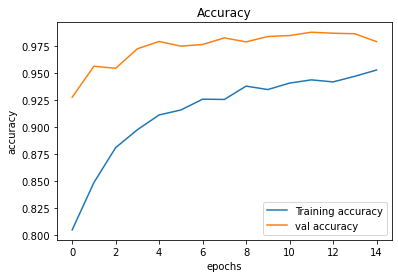

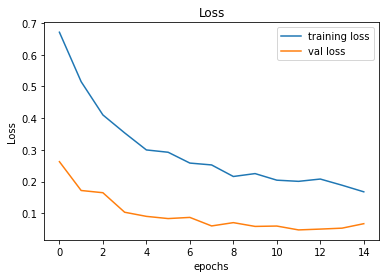

In [32]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

test = pd.read_csv("G:/speed_racing_datasets/Test.csv")
test_labels = test['ClassId'].values

test_img_path = (r"G:/speed_racing_datasets")
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

(12630, 30, 30, 3)


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [34]:
predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))

accuracy:  0.9495645288994458


In [35]:
model.save('traffic_classifier.h5')

In [44]:
from tkinter import filedialog
from tkinter import *

import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs


In [ ]:
import numpy as np
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
import numpy 
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Priority road
Pedestrians


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\.conda\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-52-ffae3e6ce230>", line 66, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-52-ffae3e6ce230>", line 61, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py", line 459, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1629, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = se

Ahead only
